In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.signal

In [33]:
import ACE_box
import importlib
importlib.reload(ACE_box)

<module 'ACE_box' from '/home/benjamin/Documents/datascience/data jam days/scripts/ACE_box.py'>

## Data import
We import the csv file.
We are interested in the  Ping_index , Ping_date , Ping_time , Latitude,  Longitude , and the sv* columns.
Each sv* column corresponds to a depth.
The value for each cell is the logarithm of the intensity of the echo.(ratio of intensity)

In [34]:
data_path = '/home/benjamin/Documents/datascience/ACE/test/'
#data_path = '/home/benjamin/Documents/datascience/ACE/'

### Filtering

In [35]:
import glob
global_swarm_list = []
for filename in glob.iglob(data_path+'*905.sv.csv'):
    print('Loading data ...')
    print('%s' % filename)    
    info_df,echogram,depth_data = ACE_box.extract_data(filename)
    print('Filtering data...')
    denoised = ACE_box.filter_data(echogram)
    print('Finding krill swarms...')
    krillsignal,energy_fluctuation = ACE_box.krill_function(denoised,1)
    print('Energy fluctuation:',energy_fluctuation)
    swarm_echo_list = ACE_box.extract_krillchunks(krillsignal,denoised)
    print("Nb of swarms found: ",len(swarm_echo_list))
    print('Extracting swarm information...')
    swarm_list = ACE_box.info_from_swarm_list(swarm_echo_list,echogram,info_df,depth_data,filename)
    print('Done.')
    print('+++++++++++++')
    global_swarm_list += swarm_list

Loading data ...
/home/benjamin/Documents/datascience/ACE/test/ACE_-D20170207-T140905.sv.csv
------------------------------
Data matrix size: (2693, 9150)
Start depth (in meters): 0.09278976
Stop depth (in meters): 499.8584359
Nb of pixels along depth axis: 2693
Depth per pixel (in meters): 0.185579519547
Echogram truncated to the first 100 meters (492 pixels).
-----------------------------
Filtering data...
Number of noisy pixels removed:  1260065.0
Finding krill swarms...
Energy fluctuation: 1.9535862867
Nb of swarms found:  68
Extracting swarm information...
Done.
+++++++++++++


In [36]:
len(global_swarm_list)

68

In [37]:
echogram_rectif = ACE_box.remove_background_noise(echogram,depth_data)

<IPython.core.display.Javascript object>


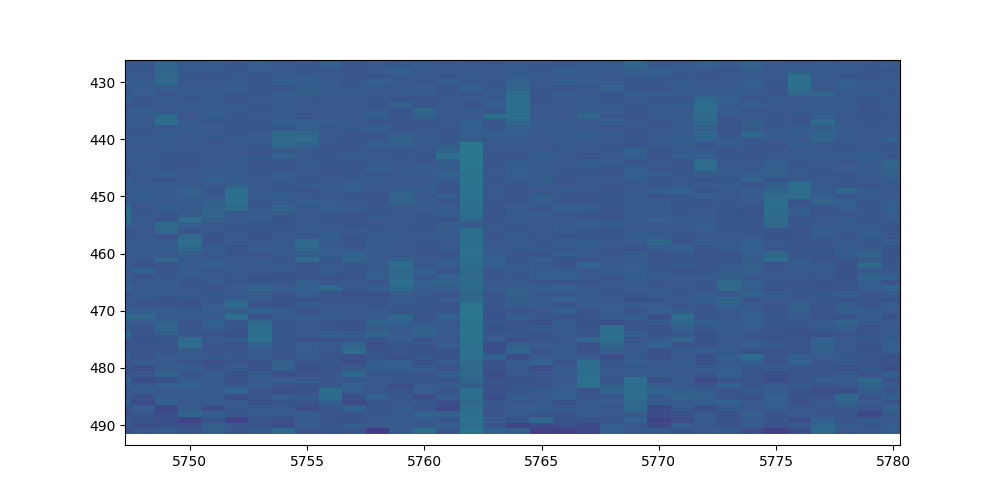

In [39]:
%matplotlib notebook
import matplotlib.patches as patches

D,L = [],[]
for swarm in global_swarm_list:
    D.append(swarm['depth_in_pixels'])
    L.append((swarm['ping_index_start']+swarm['ping_index_stop'])/2)

fig1 = plt.figure(figsize=(10,5))
ax1 = fig1.add_subplot(111, aspect='equal')
#fig1,ax1 = plt.subplots()
ax1.imshow(echogram_rectif, aspect='auto')
#ax1.imshow(denoised, aspect='auto')

ax1.scatter(L,D,c='r',alpha=0.3)
for swarm in global_swarm_list:
    height = swarm['height_in_pixels']
    y = swarm['depth_in_pixels'] - height/2
    x = swarm['ping_index_start']
    width = swarm['ping_index_stop'] - x
    rect = patches.Rectangle((x,y),width,height,fill=False,color='r',linewidth=2.5,alpha=0.5)
    # Create a Rectangle patch
    #rect = patches.Rectangle((50,100),40,30,linewidth=2.5,edgecolor='r',facecolor='none')
    # Add the patch to the Axes
    ax1.add_patch(rect)
plt.show()

<IPython.core.display.Javascript object>


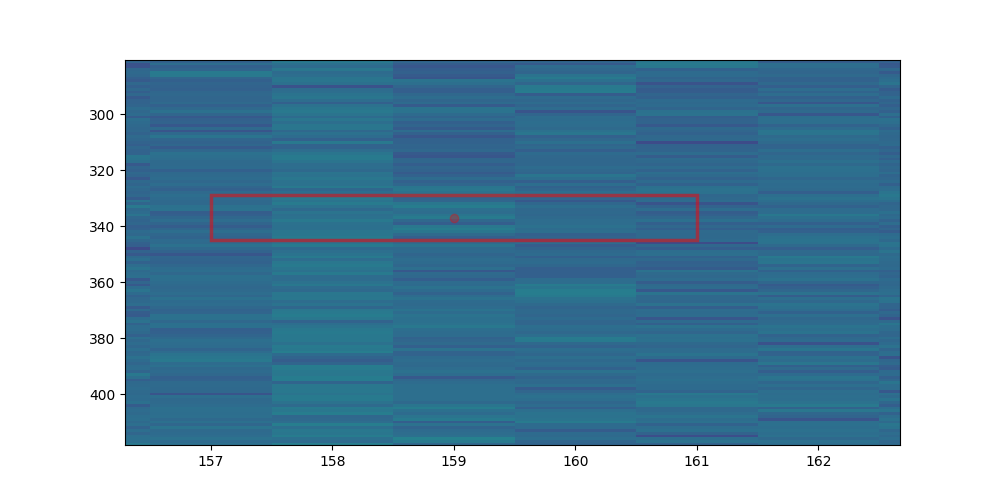

In [32]:
%matplotlib notebook
import matplotlib.patches as patches

D,L = [],[]
for swarm in global_swarm_list:
    D.append(swarm['depth_in_pixels'])
    L.append((swarm['ping_index_start']+swarm['ping_index_stop'])/2)

fig1 = plt.figure(figsize=(10,5))
ax1 = fig1.add_subplot(111, aspect='equal')
#fig1,ax1 = plt.subplots()
ax1.imshow(echogram, aspect='auto')

ax1.scatter(L,D,c='r',alpha=0.3)
for swarm in global_swarm_list:
    height = swarm['height_in_pixels']
    y = swarm['depth_in_pixels'] - height/2
    x = swarm['ping_index_start']
    width = swarm['ping_index_stop'] - x
    rect = patches.Rectangle((x,y),width,height,fill=False,color='r',linewidth=2.5,alpha=0.5)
    # Create a Rectangle patch
    #rect = patches.Rectangle((50,100),40,30,linewidth=2.5,edgecolor='r',facecolor='none')
    # Add the patch to the Axes
    ax1.add_patch(rect)
plt.show()

In [10]:
import csv

keys = global_swarm_list[0].keys()
with open('swarms.csv', 'w') as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(global_swarm_list)